In [6]:
# git clone https://github.com/THU-MIG/yolov10.git

Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 2] 지정된 파일을 찾을 수 없습니다 while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


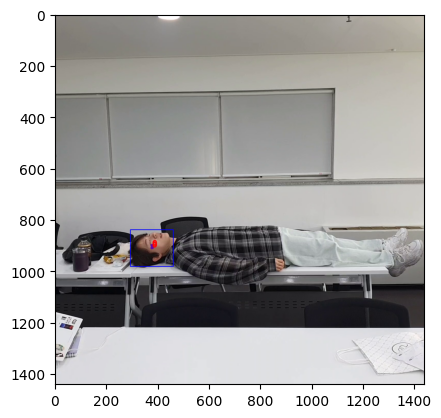

In [2]:
from ultralytics import YOLOv10
import torch

# 최적 가중치 로드
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
best_model_path = r'.\yolov7\save_model\yolov10_nano_head_finetuned_64_30\yolov10_best.pt'
model = YOLOv10(best_model_path)
model = model.to(device)

# yolov10 비디오 테스트
import module.Tracking as tr
import importlib
importlib.reload(tr)
%matplotlib inline
falldown_video_path = r".\test_video\falldown_large.mp4"
falldown_save_path = r"..\101.ppt\video\v10_nano_head_64_30_falldwon_large.mp4" # 수정할곳
# falldown_video_path = r".\test_video\falldown_small.mp4"
# falldown_save_path = r"..\101.ppt\video\v10_nano_head_64_30_falldown_small.mp4" # 수정할곳
sleep_video_path = r".\test_video\sleep_large.mp4"
sleep_save_path = r"..\101.ppt\video\v10_nano_head_64_30_sleep_large.mp4" # 수정할곳
# sleep_video_path = r".\test_video\sleep_small.mp4"
# sleep_save_path = r"..\101.ppt\video\v10_nano_head_64_30_sleep_small.mp4" # 수정할곳
obj_thres = 100 
update_thres = 40 
tracking_count = 50
track_video = tr.Tracking(model, True)
# ps_route, ps_dist = track_video.track_video(obj_thres, update_thres, tracking_count, video_path, True) # 샘플만 확인, 저장안함

# falldown 영상 
ps_route, ps_dist, ps_all_route, recognized_count = track_video.track_video(obj_thres, update_thres, tracking_count, falldown_video_path, False, falldown_save_path) # 비디오경로, 샘플링여부(100프레임만), 저장여부(파일이름으로 지정)

# 결과 파일로 저장
import os
import json
result_save_root = r"test_video\tracking"
result_save_file = falldown_save_path.split("\\")[-1].split(".")[0] + ".json"
result_save_path = os.path.join(result_save_root, result_save_file)

result_falldown = {"ps_route" : ps_route, "ps_dist" : ps_dist, "ps_all_route" : ps_all_route, "recognized_count" : recognized_count}

with open(result_save_path, "w") as f:
    json.dump(result_falldown, f)
    
# # sleep 영상 
ps_route, ps_dist, ps_all_route, recognized_count = track_video.track_video(obj_thres, update_thres, tracking_count, sleep_video_path, False, sleep_save_path) # 비디오경로, 샘플링여부(100프레임만), 저장여부(파일이름으로 지정)

# 결과 파일로 저장
result_save_root = r"test_video\tracking"
result_save_file = sleep_save_path.split("\\")[-1].split(".")[0] + ".json"
result_save_path = os.path.join(result_save_root, result_save_file)

result_falldown = {"ps_route" : ps_route, "ps_dist" : ps_dist, "ps_all_route" : ps_all_route, "recognized_count" : recognized_count}

with open(result_save_path, "w") as f:
    json.dump(result_falldown, f)

In [3]:
# 인퍼런스 속도 체크
import cv2
import time
import torch
from ultralytics import YOLOv10

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
best_model_path = r'.\yolov7\save_model\yolov10_nano_head_finetuned_64_30\yolov10_best.pt'
model = YOLOv10(best_model_path)
model = model.to(device)

speed_test_path = r"..\01.Data\head\valid_resized\images\PartB_00000_jpg.rf.433c77013eff2c84abfe0e3edeea9110.jpg"
img = cv2.imread(speed_test_path)
start = time.time()
model(img, True)
end = time.time()
print(f"{end - start:.5f} sec")

0.15812 sec
